In [252]:
import pandas as pd
import numpy as np

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
df=pd.read_csv(r'C:\Users\esvit\Downloads\Downloads\data science\OMDENA\Imputed_data\air_quality_partial_imputation.csv')
df.head()

,DATE,POLSTID,Voivodeship,City,county,postcode,LAT,LON,NO2_24H_AVG_POLLUTION,O3_24H_AVG_POLLUTION,...,dayofweek,station_abbrev,NO2_impute_status,O3_impute_status,PM10_impute_status,PM25_impute_status,Station code,Station type,Region type,Station model
0,2017-01-01,DsBoleslaMOB,DOLNOŚLĄSKIE,Bolesławiec,powiat bolesławiecki,59-700,51.263245,15.570354,NaN,NaN,...,6,DsBolesla,Not Measured,Pending,Not Measured,Not Measured,DsBoleslaMOB,background,urban,mobile
1,2017-01-01,DsCzerStraza,DOLNOŚLĄSKIE,Czerniawa,powiat lubański,59-850,50.912475,15.312190,NaN,90.39,...,6,DsCzer,Not Measured,Pending,Not Measured,Not Measured,DsCzerStraza,background,nonurban,container
2,2017-01-01,DsGlogWiStwo,DOLNOŚLĄSKIE,Głogów,powiat głogowski,67-200,51.657022,16.097822,NaN,NaN,...,6,DsGlog,Not Measured,Not Measured,Imputed,Not Measured,DsGlogWiStwo,background,urban,dust collector
3,2017-01-01,DsJaworMOB,DOLNOŚLĄSKIE,Jawor,powiat jaworski,59-400,51.049212,16.202317,NaN,NaN,...,6,DsJawor,Not Measured,Not Measured,Pending,Not Measured,DsJaworMOB,background,urban,mobile
4,2017-01-01,DsJelGorOgin,DOLNOŚLĄSKIE,Jelenia Góra,powiat Jelenia Góra,58-506,50.913433,15.765608,NaN,11.98,...,6,DsJel,Not Measured,Not Required,Not Measured,Not Measured,DsJelGorOgin,background,urban,container


In [255]:
df.shape

(542322, 25)

In [256]:
df.columns

Index(['DATE', 'POLSTID', 'Voivodeship', 'City', 'county', 'postcode', 'LAT',
       'LON', 'NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION',
       'PM10_24H_AVG_POLLUTION', 'PM25_24H_AVG_POLLUTION', 'day', 'month',
       'year', 'dayofweek', 'station_abbrev', 'NO2_impute_status',
       'O3_impute_status', 'PM10_impute_status', 'PM25_impute_status',
       'Station code', 'Station type', 'Region type', 'Station model'],
      dtype='object')

In [257]:
df.isna().mean()*100

DATE                       0.000000
POLSTID                    0.000000
Voivodeship                0.000000
City                       0.000000
county                     0.000000
postcode                   0.000000
LAT                        0.000000
LON                        0.000000
NO2_24H_AVG_POLLUTION     98.989899
O3_24H_AVG_POLLUTION      64.560353
PM10_24H_AVG_POLLUTION    39.305247
PM25_24H_AVG_POLLUTION    77.294670
day                        0.000000
month                      0.000000
year                       0.000000
dayofweek                  0.000000
station_abbrev             0.000000
NO2_impute_status          0.000000
O3_impute_status           0.000000
PM10_impute_status         0.000000
PM25_impute_status         0.000000
Station code               0.000000
Station type               0.000000
Region type                0.000000
Station model              0.000000
dtype: float64

# PM_10 IMPUTATION

<AxesSubplot:ylabel='Frequency'>

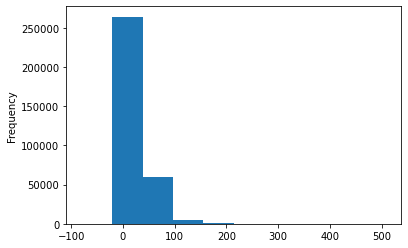

In [258]:
df['PM10_24H_AVG_POLLUTION'].plot(kind='hist')

# imputing back fill

In [259]:
df[['PM10_24H_AVG_POLLUTION']]

,PM10_24H_AVG_POLLUTION
0,NaN
1,NaN
2,30.68
3,NaN
4,NaN
...,...
542317,NaN
542318,9.80
542319,4.55
542320,4.35


In [260]:
df['PM10_24H_AVG_POLLUTION_bfill']=df['PM10_24H_AVG_POLLUTION'].fillna(method='bfill')

In [261]:
df[['PM10_24H_AVG_POLLUTION','PM10_24H_AVG_POLLUTION_bfill']]

,PM10_24H_AVG_POLLUTION,PM10_24H_AVG_POLLUTION_bfill
0,NaN,30.68
1,NaN,30.68
2,30.68,30.68
3,NaN,54.00
4,NaN,54.00
...,...,...
542317,NaN,9.80
542318,9.80,9.80
542319,4.55,4.55
542320,4.35,4.35


In [265]:
df[['PM10_24H_AVG_POLLUTION']].head(10)

,PM10_24H_AVG_POLLUTION
0,NaN
1,NaN
2,30.68
3,NaN
4,NaN
5,54.00
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
#all nan values are filled with next non null values

In [266]:
df[['PM10_24H_AVG_POLLUTION','PM10_24H_AVG_POLLUTION_bfill']].isna().sum()

PM10_24H_AVG_POLLUTION          213161
PM10_24H_AVG_POLLUTION_bfill         1
dtype: int64

<AxesSubplot:ylabel='Frequency'>

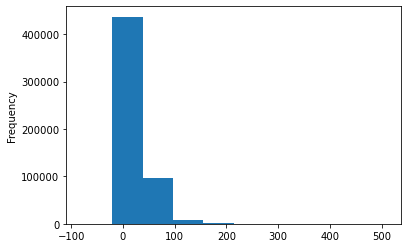

In [267]:
df['PM10_24H_AVG_POLLUTION_bfill'].plot(kind='hist')

# random fill

In [268]:
df['PM10_24H_AVG_POLLUTION_randomfill']=df['PM10_24H_AVG_POLLUTION']
df['PM10_24H_AVG_POLLUTION_randomfill']

0           NaN
1           NaN
2         30.68
3           NaN
4           NaN
          ...  
542317      NaN
542318     9.80
542319     4.55
542320     4.35
542321      NaN
Name: PM10_24H_AVG_POLLUTION_randomfill, Length: 542322, dtype: float64

In [269]:
import warnings
warnings.filterwarnings('ignore')

In [270]:
df['PM10_24H_AVG_POLLUTION_randomfill'][df['PM10_24H_AVG_POLLUTION_randomfill'].isna()]=df['PM10_24H_AVG_POLLUTION_randomfill'].dropna().sample(df['PM10_24H_AVG_POLLUTION_randomfill'].isna().sum(),random_state=1).values

In [272]:
#taking null values and then filling it with sample of size of null values with availaible values

In [273]:
df[['PM10_24H_AVG_POLLUTION','PM10_24H_AVG_POLLUTION_randomfill']]

,PM10_24H_AVG_POLLUTION,PM10_24H_AVG_POLLUTION_randomfill
0,NaN,10.186813
1,NaN,13.000000
2,30.68,30.680000
3,NaN,16.830000
4,NaN,14.920000
...,...,...
542317,NaN,18.251718
542318,9.80,9.800000
542319,4.55,4.550000
542320,4.35,4.350000


In [274]:
df['PM10_24H_AVG_POLLUTION_randomfill'].isna().sum()

0

<AxesSubplot:>

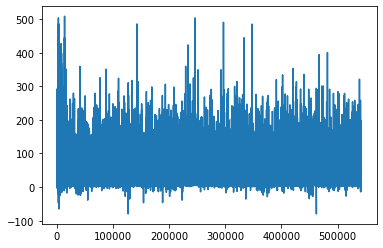

In [275]:
df['PM10_24H_AVG_POLLUTION_randomfill'].plot()

In [276]:
#variance of original columns
df['PM10_24H_AVG_POLLUTION'].var()

484.2212954052497

In [277]:
#variance with random fill column
df['PM10_24H_AVG_POLLUTION_randomfill'].var()

484.73560977795324

In [278]:
#variance with backfill
df['PM10_24H_AVG_POLLUTION_bfill'].var()

469.6165204543483

In [ ]:
#random fill works well

# O3 IMPUTATION

<AxesSubplot:ylabel='Frequency'>

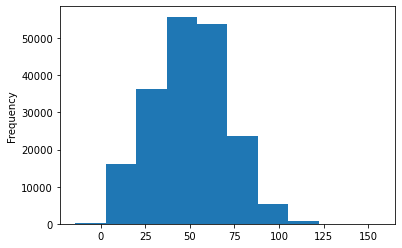

In [279]:
df['O3_24H_AVG_POLLUTION'].plot(kind='hist')

# imputation through rolling mean

In [280]:
df['O3_24H_AVG_POLLUTION_rollingfill']=df['O3_24H_AVG_POLLUTION'].fillna(df['O3_24H_AVG_POLLUTION'].rolling(window=21,min_periods=1).mean())

In [290]:
#filling null by taking 21 hour prior mean

In [291]:
df[['O3_24H_AVG_POLLUTION','O3_24H_AVG_POLLUTION_rollingfill']].tail(5)

,O3_24H_AVG_POLLUTION,O3_24H_AVG_POLLUTION_rollingfill
542317,NaN,34.335000
542318,NaN,34.335000
542319,NaN,34.335000
542320,NaN,35.053333
542321,34.4,34.400000


In [292]:
df['O3_24H_AVG_POLLUTION_rollingfill']

0               NaN
1         90.390000
2         90.390000
3         90.390000
4         11.980000
            ...    
542317    34.335000
542318    34.335000
542319    34.335000
542320    35.053333
542321    34.400000
Name: O3_24H_AVG_POLLUTION_rollingfill, Length: 542322, dtype: float64

<AxesSubplot:>

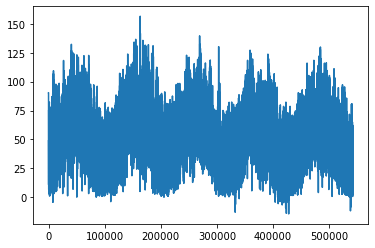

In [293]:
df['O3_24H_AVG_POLLUTION_rollingfill'].plot()

<AxesSubplot:>

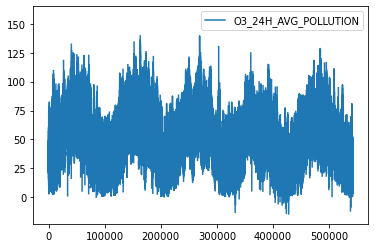

In [294]:
df[['O3_24H_AVG_POLLUTION']].plot()

In [295]:
df[['O3_24H_AVG_POLLUTION','O3_24H_AVG_POLLUTION_rollingfill']].isna().sum()

O3_24H_AVG_POLLUTION                350125
O3_24H_AVG_POLLUTION_rollingfill         1
dtype: int64

In [296]:
#only the starting null value is left since no prior observation to it

<AxesSubplot:ylabel='Frequency'>

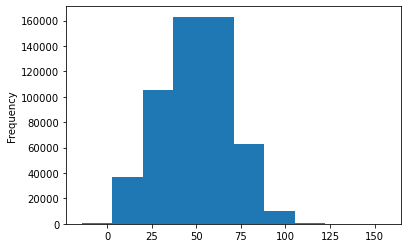

In [297]:
df['O3_24H_AVG_POLLUTION_rollingfill'].plot(kind='hist')

In [298]:
df['O3_24H_AVG_POLLUTION_rollingfill'].var()

375.7348259384817

In [299]:
df['O3_24H_AVG_POLLUTION'].var()

432.07125346904286

# PM25_

# rolling mean

In [300]:
df['PM25_24H_AVG_POLLUTION']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
542317     NaN
542318     NaN
542319    3.79
542320     NaN
542321     NaN
Name: PM25_24H_AVG_POLLUTION, Length: 542322, dtype: float64

In [301]:
df['PM25_24H_AVG_POLLUTION'].isna().sum()

419186

In [302]:
df['PM25_24H_AVG_POLLUTION_rollingfill']=df['PM25_24H_AVG_POLLUTION']

In [303]:
df['PM25_24H_AVG_POLLUTION_rollingfill']=df['PM25_24H_AVG_POLLUTION_rollingfill'].fillna(df['PM25_24H_AVG_POLLUTION'].rolling(window=19,min_periods=1).mean())

In [304]:
df[['PM25_24H_AVG_POLLUTION','PM25_24H_AVG_POLLUTION_rollingfill']]

,PM25_24H_AVG_POLLUTION,PM25_24H_AVG_POLLUTION_rollingfill
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
542317,NaN,7.21
542318,NaN,7.21
542319,3.79,3.79
542320,NaN,5.73


In [305]:
df[['PM25_24H_AVG_POLLUTION','PM25_24H_AVG_POLLUTION_rollingfill']].isna().sum()

PM25_24H_AVG_POLLUTION                419186
PM25_24H_AVG_POLLUTION_rollingfill        10
dtype: int64

In [307]:
#upper 10 consecutive values remain null because no prior values but can be filled with mean after riolling fill.

<AxesSubplot:>

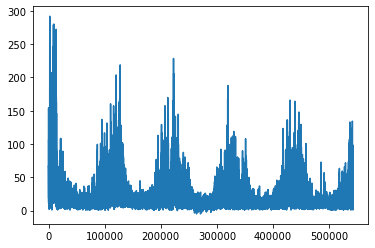

In [308]:
df['PM25_24H_AVG_POLLUTION_rollingfill'].plot()

<AxesSubplot:>

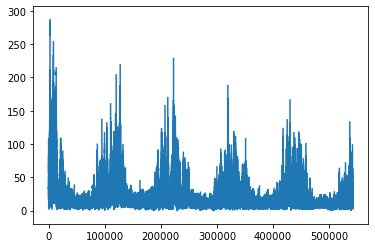

In [309]:
df['PM25_24H_AVG_POLLUTION'].plot()

In [310]:
df['PM25_24H_AVG_POLLUTION'].var()

303.04925894550945

In [311]:
df['PM25_24H_AVG_POLLUTION_rollingfill'].var()

252.15522396620042

# No2 fill

# KNN-nan eucldiean distance

In [334]:
df.head(2)

,DATE,POLSTID,Voivodeship,City,county,postcode,LAT,LON,NO2_24H_AVG_POLLUTION,O3_24H_AVG_POLLUTION,...,PM10_impute_status,PM25_impute_status,Station code,Station type,Region type,Station model,PM10_24H_AVG_POLLUTION_bfill,PM10_24H_AVG_POLLUTION_randomfill,O3_24H_AVG_POLLUTION_rollingfill,PM25_24H_AVG_POLLUTION_rollingfill
0,2017-01-01,DsBoleslaMOB,DOLNOŚLĄSKIE,Bolesławiec,powiat bolesławiecki,59-700,51.263245,15.570354,NaN,NaN,...,Not Measured,Not Measured,DsBoleslaMOB,background,urban,mobile,30.68,10.186813,NaN,NaN
1,2017-01-01,DsCzerStraza,DOLNOŚLĄSKIE,Czerniawa,powiat lubański,59-850,50.912475,15.312190,NaN,90.39,...,Not Measured,Not Measured,DsCzerStraza,background,nonurban,container,30.68,13.000000,90.39,NaN


In [335]:
df.columns

Index(['DATE', 'POLSTID', 'Voivodeship', 'City', 'county', 'postcode', 'LAT',
       'LON', 'NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION',
       'PM10_24H_AVG_POLLUTION', 'PM25_24H_AVG_POLLUTION', 'day', 'month',
       'year', 'dayofweek', 'station_abbrev', 'NO2_impute_status',
       'O3_impute_status', 'PM10_impute_status', 'PM25_impute_status',
       'Station code', 'Station type', 'Region type', 'Station model',
       'PM10_24H_AVG_POLLUTION_bfill', 'PM10_24H_AVG_POLLUTION_randomfill',
       'O3_24H_AVG_POLLUTION_rollingfill',
       'PM25_24H_AVG_POLLUTION_rollingfill'],
      dtype='object')

In [336]:
df_new=df[['NO2_24H_AVG_POLLUTION','PM10_24H_AVG_POLLUTION_randomfill','O3_24H_AVG_POLLUTION_rollingfill','PM25_24H_AVG_POLLUTION_rollingfill']]
df_new

,NO2_24H_AVG_POLLUTION,PM10_24H_AVG_POLLUTION_randomfill,O3_24H_AVG_POLLUTION_rollingfill,PM25_24H_AVG_POLLUTION_rollingfill
0,NaN,10.186813,NaN,NaN
1,NaN,13.000000,90.390000,NaN
2,NaN,30.680000,90.390000,NaN
3,NaN,16.830000,90.390000,NaN
4,NaN,14.920000,11.980000,NaN
...,...,...,...,...
542317,NaN,18.251718,34.335000,7.21
542318,NaN,9.800000,34.335000,7.21
542319,NaN,4.550000,34.335000,3.79
542320,NaN,4.350000,35.053333,5.73


In [337]:
df_new.isna().sum()

NO2_24H_AVG_POLLUTION                 536844
PM10_24H_AVG_POLLUTION_randomfill          0
O3_24H_AVG_POLLUTION_rollingfill           1
PM25_24H_AVG_POLLUTION_rollingfill        10
dtype: int64

In [338]:
from sklearn.impute import KNNImputer

In [339]:
knn = KNNImputer(n_neighbors=2,weights='distance')

In [342]:
df_new['NO2_24H_AVG_POLLUTION_imp']=df_new[['NO2_24H_AVG_POLLUTION']]
df_new[['NO2_24H_AVG_POLLUTION_imp']]

,NO2_24H_AVG_POLLUTION_imp
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
542317,NaN
542318,NaN
542319,NaN
542320,NaN


In [345]:
df_new['NO2_24H_AVG_POLLUTION_imp'].isna().sum()

536844

In [346]:
df_new['NO2_24H_AVG_POLLUTION_imp']=knn.fit_transform(df_new[['NO2_24H_AVG_POLLUTION_imp']])
df_new['NO2_24H_AVG_POLLUTION_imp']

KeyboardInterrupt: 